#
---

1. Estimate the average number of distinct items (num_distinct_items) per order and explore bias in your estimation. Generate 1,000 random samples with a sample size of 50, and compare the sample means to the population mean using these simulations.
2. Simulate 100 random samples of total_items and estimate the average number of items per order. Does the average fall within a reasonable range (e.g., between 2 and 5 items)?
3. What is the minimum item price (in cents) based on a random sample of 80 orders from the dataset?
4. Simulate 100 random samples of total_busy_dashers and test if the number of busy dashers is typically greater than 15.
5. Simulate 100 random samples from min_item_price and estimate whether the average minimum item price is greater than 500 cents (or $5).

## About the data:
The dataset contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds
\
\
**Time features:**\
market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
created_at: Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Note this timestamp is in UTC, but in case you need it, the actual timezone of the region was US/Pacific)
actual_delivery_time: Timestamp in UTC when the order was delivered to the consumer
delivery_time_seconds: Subtracted 'created_at' from 'actual_delivery_time' after converting both to datetimes. This is in seconds.
\
\
**Store features:**\
store_id: an id representing the restaurant the order was submitted for
store_primary_category: cuisine category of the restaurant, e.g., italian, asian
order_protocol: a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol
\
\
**Order features:**\
total_items: total number of items in the order
subtotal: total value of the order submitted (in cents)
num_distinct_items: number of distinct items included in the order
min_item_price: price of the item with the least cost in the order (in cents)
max_item_price: price of the item with the highest cost in the order (in cents)
\
\
**Market features:**\
DoorDash being a marketplace, we have information on the state of marketplace when the order is placed, that can be used to estimate delivery time. The following features are values at the time of `created_at` (order submission time)
total_onshift_dashers: Number of available dashers who are within 10 miles of the store at the time of order creation
total_busy_dashers: Subset of above `total_onshift_dashers` who are currently working on an order
total_outstanding_orders: Number of orders within 10 miles of this order that are currently being processed.

# Code below

### Prep the environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy import stats

Read the delivery_data_clean into the environment and look at it

In [2]:
# URL of the CSV file
url = "https://github.com/alee103/intro_to_stats/raw/main/delivery_data_clean.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time_seconds
0,2.0,2015-01-29 02:59:44,2015-01-29 03:37:58,6865,mexican,5.0,1,1499,1,799,799,103.0,87.0,127.0,251,609.0,2294.0
1,1.0,2015-01-31 02:12:31,2015-01-31 03:11:51,3368,pizza,3.0,3,3722,3,499,1399,22.0,22.0,23.0,251,576.0,3560.0
2,5.0,2015-02-12 23:49:21,2015-02-13 00:23:29,5370,american,5.0,2,1935,2,645,995,7.0,3.0,3.0,251,660.0,2048.0
3,4.0,2015-01-23 01:13:15,2015-01-23 01:57:50,558,seafood,5.0,5,5500,4,750,1600,47.0,36.0,53.0,251,690.0,2675.0
4,1.0,2015-02-01 03:07:00,2015-02-01 03:40:23,2582,barbecue,1.0,1,925,1,925,925,58.0,55.0,41.0,446,217.0,2003.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70333 entries, 0 to 70332
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     70333 non-null  float64
 1   created_at                                    70333 non-null  object 
 2   actual_delivery_time                          70333 non-null  object 
 3   store_id                                      70333 non-null  int64  
 4   store_primary_category                        70333 non-null  object 
 5   order_protocol                                70333 non-null  float64
 6   total_items                                   70333 non-null  int64  
 7   subtotal                                      70333 non-null  int64  
 8   num_distinct_items                            70333 non-null  int64  
 9   min_item_price                                70333 non-null 

###  1: Estimate the average number of distinct items (num_distinct_items) per order and explore bias in your estimation. Generate 1,000 random samples with a sample size of 50, and compare the sample means to the population mean using these simulations.

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Extract the number of distinct items
total_items = df['total_items'].dropna()

# Calculate the population mean
population_mean = np.mean(total_items)

# Perform 1000 simulations of sample means with sample size 50
sample_means = []
sample_size = 50

for _ in range(1000):
    sample = np.random.choice(total_items, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Sanity check: look at the first 5 items
sample_means[:5]

[2.64, 3.04, 2.72, 2.66, 2.48]

In [5]:
# Calculate bias: the difference between the average of the sample means and the population mean
bias = np.mean(sample_means) - population_mean
print(f"Bias in estimation: {bias}")

Bias in estimation: -0.006608289991895777


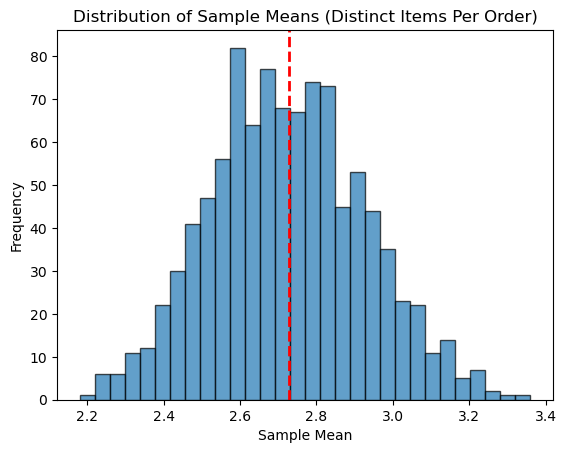

In [6]:
# Plot the distribution of sample means
plt.hist(sample_means, bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Sample Means (Distinct Items Per Order)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.axvline(population_mean, color='r', linestyle='dashed', linewidth=2)
plt.show()

###  2: Simulate 100 random samples of total_items and estimate the average number of items per order. Does the average fall within a reasonable range (e.g., between 2 and 5 items)?

In [29]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate 100 random samples of 'num_distinct_items'
n_samples = 100
random_samples = np.random.choice(df['num_distinct_items'], size=n_samples)

In [30]:
# Calculate the average number of distinct items in the random sample
average_items = np.mean(random_samples)

print(f"Average Number of Distinct Items in Random Sample: {average_items:.2f}")

Average Number of Distinct Items in Random Sample: 2.48


In [9]:
# Hypothesis: Is the average between 2 and 5 items?
if 2 <= average_items <= 5:
    print("The average number of distinct items falls within the reasonable range (2 to 5 items).")
else:
    print("The average number of distinct items does not fall within the reasonable range (2 to 5 items).")

The average number of distinct items falls within the reasonable range (2 to 5 items).


###  3: What is the minimum item price (in cents) based on a sample of 80 orders from the dataset?

In [32]:
# Set random seed for reproducibility
np.random.seed(42)

# Randomly sample 80 values from 'max_item_price' column
random_sample = np.random.choice(df['max_item_price'], size=80, replace=False)

# Calculate the max price in the sample
max_price = np.max(random_sample)
min_price = np.min(random_sample)

print(f"Max Item Price in Sample: {max_price} cents")
print(f"Min Item Price in Sample: {min_price} cents")

Max Item Price in Sample: 2050 cents
Min Item Price in Sample: 189 cents


###  4: Simulate 100 random samples of total_busy_dashers and test if the number of busy dashers is typically greater than 15.

In [33]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate 100 random samples of total_onshift_dashers
n_samples = 100
random_dashers_samples = np.random.choice(df['total_onshift_dashers'], size=n_samples)
random_busy_dashers_samples = np.random.choice(df['total_busy_dashers'], size=n_samples)

In [34]:
# Calculate the proportion of samples where the number of on shift dashers is greater than 15
proportion_greater_than_15 = np.mean(random_dashers_samples > 15)
print(f"Proportion of on shift Dashers Greater Than 15: {proportion_greater_than_15:.2f}")

print(f"Proportion of busy Dashers Greater Than 15: {np.mean(random_busy_dashers_samples > 15):.2f}")

Proportion of on shift Dashers Greater Than 15: 0.75
Proportion of busy Dashers Greater Than 15: 0.88


In [13]:
# Hypothesis: Are more than 15 dashers on shift in most cases?
if proportion_greater_than_15 > 0.5:
    print("More than 15 dashers are on shift in most cases.")
else:
    print("Less than or equal to 15 dashers are on shift in most cases.")

More than 15 dashers are on shift in most cases.


###  5: Simulate 100 random samples from min_item_price and estimate whether the average minimum item price is greater than 500 cents (or $5).

In [35]:
# Set random seed for reproducibility
np.random.seed(42)

# Simulate 100 random samples of 'max_item_price'
n_samples = 100
random_max_prices = np.random.choice(df['max_item_price'], size=n_samples)
random_min_prices = np.random.choice(df['min_item_price'], size=n_samples)

# Calculate the average maximum price in the random sample
average_max_price = np.mean(random_max_prices)
average_min_price = np.mean(random_min_prices)

print(f"Average maximum Price in Random Sample: {average_max_price:.2f} cents")
print(f"Average minimum Price in Random Sample: {average_min_price} cents")

# Hypothesis: Is the average maximum price greater than 2000 cents ($20)?
if average_max_price > 2000:
    print("The average maximum price is greater than $20.")
else:
    print("The average maximum price is less than or equal to $20.")

Average maximum Price in Random Sample: 1105.39 cents
Average minimum Price in Random Sample: 661.55 cents
The average maximum price is less than or equal to $20.


# Estimate the average number of distinct items (num_distinct_items) per order and explore bias in your estimation. Generate 1,000 random samples with a sample size of 50, and compare the sample means to the population mean using these simulations.


In [24]:
# Estimate the average number of distinct items (num_distinct_items) per order and explore bias in your estimation. 

# Generate 1,000 random samples with a sample size of 50, and compare the sample means to the population mean using these simulations.

np.random.seed(42)

n_samples = 1000
sample_size = 50

# Generate 1000 random samples of 'num_distinct_items' with sample size 50
random_sample_means = [np.mean(np.random.choice(df['num_distinct_items'], size=sample_size)) for _ in range(n_samples)]

#random_sample_means = np.random.choice(df['num_distinct_items'], size=n_samples)

average_num_distinct_items = np.mean(df['num_distinct_items'])

print(f"Population Mean: {average_num_distinct_items}")

# What is the bias between the mean of the sample means and the population mean (mean of sample means - population mean)?
bias = np.mean(random_sample_means) - average_num_distinct_items
print(f"Bias in Estimation: {bias}")


Population Mean: 2.401333655609742
Bias in Estimation: -0.005193655609742276


In [18]:
#Simulate 100 random samples of total_items and estimate the average number of items per order. 
np.random.seed(42)

n_samples = 100

# Generate 100 random samples of 'total_items'
random_samples = [np.random.choice(df['total_items']) for _ in range(n_samples)]

# Calculate the average number of items in the random sample
average_items = np.mean(random_samples)

#What is the average number of items in the random sample?
print(f"Average Number of Items in Random Sample: {average_items}")


Average Number of Items in Random Sample: 2.84
